In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Data Pre-processing

In [2]:
#Reading CSVs
non_diff = pd.read_csv(r'data\non_diff.csv')
diff = pd.read_csv(r'data\diff.csv')
eta_diff_diffractive = pd.read_csv(r'data\eta_diff_diff.csv')
eta_diff_non_diffractive = pd.read_csv(r'data\eta_diff_non_diff.csv')

non_diff['process_type'] = 'non_diff'
diff['process_type'] = 'diff'


In [3]:
# Merging data sets
eta_diff = pd.concat([eta_diff_non_diffractive, eta_diff_diffractive])
data = pd.concat([non_diff, diff])
data = pd.concat([data, eta_diff], axis=1)

In [4]:
# Label encoding
data['process_type'] = data['process_type'].map({'non_diff': 0, 'diff': 1})

In [5]:
data

,mult,pT,eta,process_type,eta_diff
0,58,40.52670,-4.0257,0,15.9904
1,56,23.03220,12.8916,0,17.3142
2,44,15.87690,12.2160,0,18.1716
3,170,101.36700,13.7982,0,14.6129
4,204,133.71900,128.2030,0,15.3682
...,...,...,...,...,...
99995,34,17.87250,-111.0620,1,18.5829
99996,22,7.07211,-64.3066,1,19.1279
99997,18,5.71640,70.7968,1,19.7665
99998,36,10.82590,74.1163,1,18.7063


In [6]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Split data into features and target
X = data.drop(columns=['process_type', 'eta'])
y = data['process_type']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [7]:
X

,mult,pT,eta_diff
0,58,40.52670,15.9904
1,56,23.03220,17.3142
2,44,15.87690,18.1716
3,170,101.36700,14.6129
4,204,133.71900,15.3682
...,...,...,...
99995,34,17.87250,18.5829
99996,22,7.07211,19.1279
99997,18,5.71640,19.7665
99998,36,10.82590,18.7063


In [8]:
# Build neural network model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

# Compile model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=16, batch_size=8, validation_split=0.2)

# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy*100:.2f}%')

# Print accuracy for each class
y_pred = model.predict(X_test)
y_pred_classes = tf.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred_classes))



Epoch 1/16


16000/16000 [==============================] - 33s 2ms/step - loss: 0.2947 - accuracy: 0.8659 - val_loss: 0.2918 - val_accuracy: 0.8648
Epoch 2/16
16000/16000 [==============================] - 29s 2ms/step - loss: 0.2913 - accuracy: 0.8680 - val_loss: 0.2961 - val_accuracy: 0.8632
Epoch 3/16
16000/16000 [==============================] - 30s 2ms/step - loss: 0.2907 - accuracy: 0.8685 - val_loss: 0.2954 - val_accuracy: 0.8637
Epoch 4/16
16000/16000 [==============================] - 69s 4ms/step - loss: 0.2904 - accuracy: 0.8684 - val_loss: 0.2938 - val_accuracy: 0.8642
Epoch 5/16
16000/16000 [==============================] - 49s 3ms/step - loss: 0.2900 - accuracy: 0.8684 - val_loss: 0.2913 - val_accuracy: 0.8659
Epoch 6/16
16000/16000 [==============================] - 35s 2ms/step - loss: 0.2901 - accuracy: 0.8686 - val_loss: 0.2913 - val_accuracy: 0.8656
Epoch 7/16
16000/16000 [==============================] - 45s 3ms/step - loss: 0.2900 - accuracy: 0.8687 - val_los

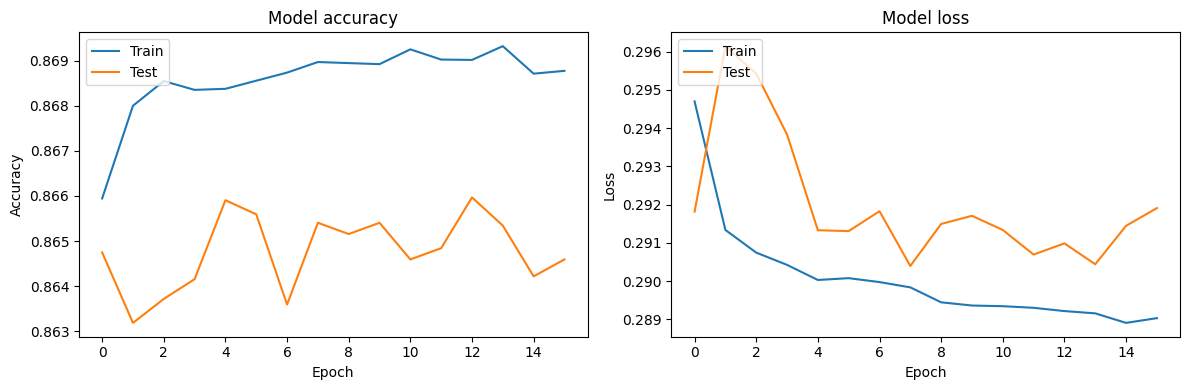

In [9]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss

log_reg = LogisticRegression(multi_class='multinomial')
log_reg_history = log_reg.fit(X_train, y_train)


# Get accuracy
accuracy = log_reg.score(X_test, y_test)
print(f'Test Accuracy: {accuracy*100:.2f}%')

# Get predictions
y_pred_proba = log_reg.predict_proba(X_test)

# Calculate loss
loss = log_loss(y_test, y_pred_proba)
print(f'Loss: {loss}')

from sklearn.metrics import classification_report

# Get predictions
y_pred = log_reg.predict(X_test)


# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))




Test Accuracy: 85.14%
Loss: 0.3349603916589429

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85     19993
           1       0.84      0.86      0.85     20007

    accuracy                           0.85     40000
   macro avg       0.85      0.85      0.85     40000
weighted avg       0.85      0.85      0.85     40000



In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, log_loss

knn = KNeighborsClassifier(n_neighbors=400)
knn.fit(X_train, y_train)

# Get accuracy
accuracy = knn.score(X_test, y_test)
print(f'Test Accuracy: {accuracy*100:.2f}%')

# Get predictions
y_pred_proba = knn.predict_proba(X_test)

# Calculate loss
loss = log_loss(y_test, y_pred_proba)
print(f'Loss: {loss:.2f}')

# Get predictions
y_pred = knn.predict(X_test)


# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Test Accuracy: 86.72%
Loss: 0.30

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87     19993
           1       0.89      0.84      0.86     20007

    accuracy                           0.87     40000
   macro avg       0.87      0.87      0.87     40000
weighted avg       0.87      0.87      0.87     40000



Text(0.5, 0, 'n_estimators')

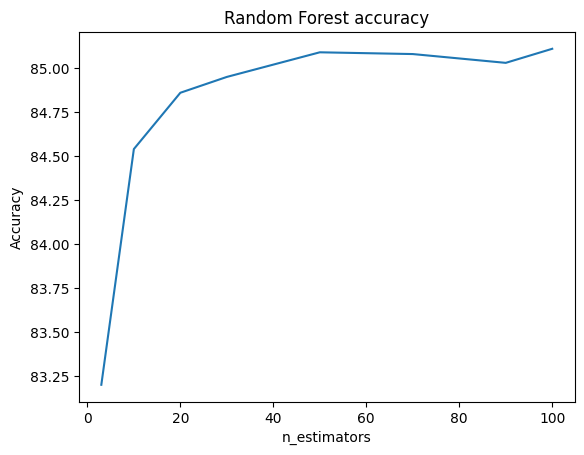

In [53]:
x_knn = [3,10,20,30,50,70,90,100]
y_knn = [83.2,
84.54,
84.86,
84.95,
85.09,
85.08,
85.03,
85.11]
plt.plot(x_knn,y_knn)
plt.title('Random Forest accuracy')
plt.ylabel('Accuracy')
plt.xlabel('n_estimators')

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = rf.predict(X_test)

# Get accuracy
accuracy = rf.score(X_test, y_test)
print(f'Test Accuracy: {accuracy*100:.2f}%')

# Print the classification report
print(classification_report(y_test, y_pred))

Test Accuracy: 85.11%
              precision    recall  f1-score   support

           0       0.84      0.87      0.85     19993
           1       0.86      0.83      0.85     20007

    accuracy                           0.85     40000
   macro avg       0.85      0.85      0.85     40000
weighted avg       0.85      0.85      0.85     40000

